https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('~/Desktop/train.csv')
df_test = pd.read_csv('~/Desktop/test.csv')
df_train['SalePrice'] = np.sqrt(df_train['SalePrice'])
Id = df_test['Id']

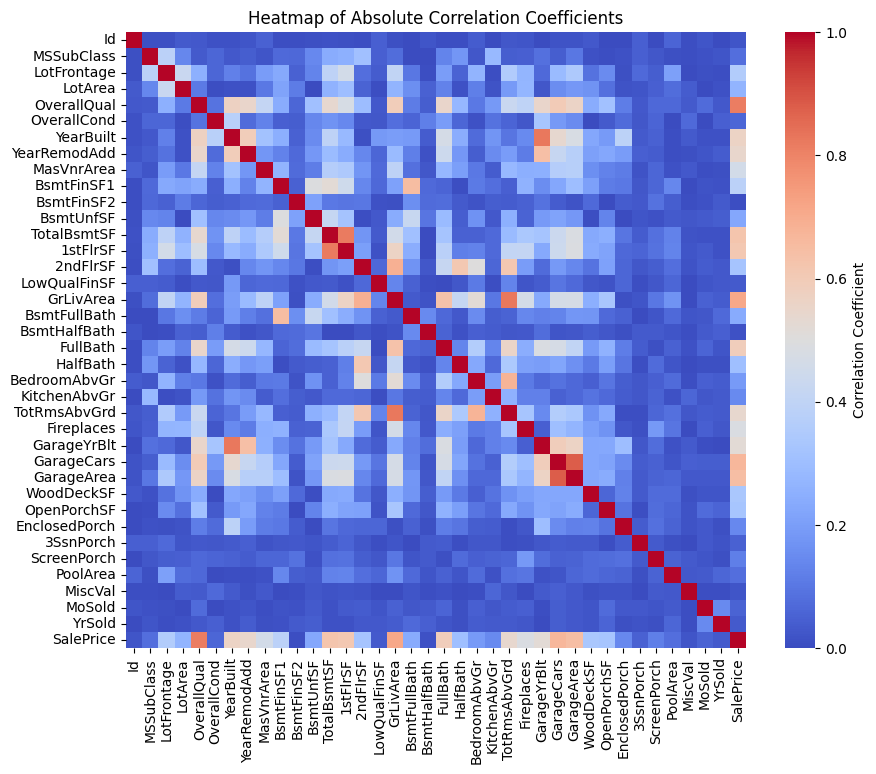

In [3]:
corr_matrix = df_train.corr(numeric_only=True)
abs_corr_matrix = np.abs(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(
    abs_corr_matrix,        
    fmt=".2f",         
    cmap="coolwarm",   
    vmin=0, vmax=1,    
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Heatmap of Absolute Correlation Coefficients')
plt.show()

In [4]:
def remove_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_train = remove_outliers(df_train)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the fitted encoders for each categorical column
label_encoders = {}

# Fit and transform the training data
for name in df_train.select_dtypes(exclude=np.number).columns:
    lbe = LabelEncoder()
    df_train[name] = lbe.fit_transform(df_train[name])  # Fit and transform on training set
    label_encoders[name] = lbe  # Store fitted encoder for later use


## 1. EDA

### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [6]:
# Descriptive Statistics of the dependent variable
df_train[['SalePrice']].describe()

,SalePrice
count,632.000000
mean,431.101345
std,82.962789
min,187.912214
25%,368.950163
50%,423.320144
75%,481.274297
max,746.043564


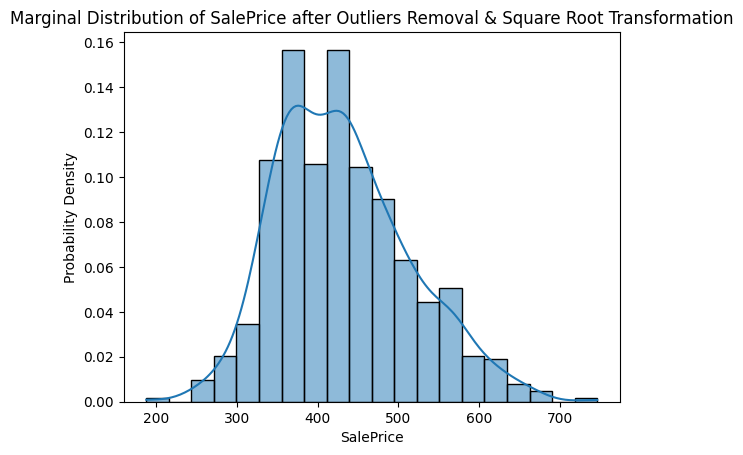

In [7]:
# Marginal Distribution of the dependent variable
sns.histplot(df_train['SalePrice'], kde = True, bins=20, stat='probability')
plt.title("Marginal Distribution of SalePrice after Outliers Removal & Square Root Transformation")
plt.xlabel("SalePrice")
plt.ylabel("Probability Density")
plt.show()

## Feature Engineer (Continuous Variables)

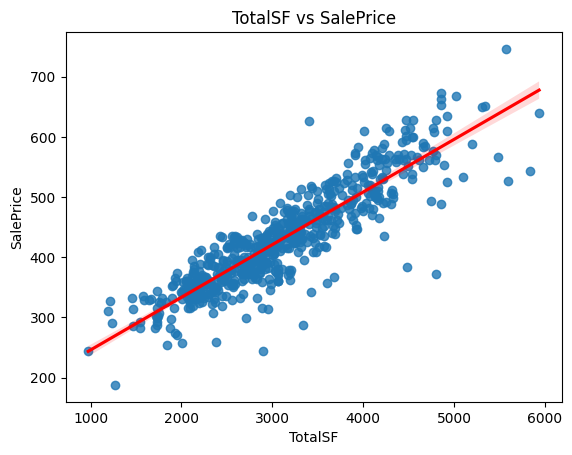

0.8901561522571682


In [8]:
# GrLivArea & TotalBsmtSF & GarageArea
df_train['TotalSF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF'] + df_train['GarageArea'] 

# Visualize the relationship between TotalSF and SalePrice
sns.regplot(data = df_train, x='TotalSF', y='SalePrice', line_kws={'color': 'r'})
plt.title("TotalSF vs SalePrice")
plt.show()
print(df_train.corr(numeric_only=True)['TotalSF']['SalePrice'])

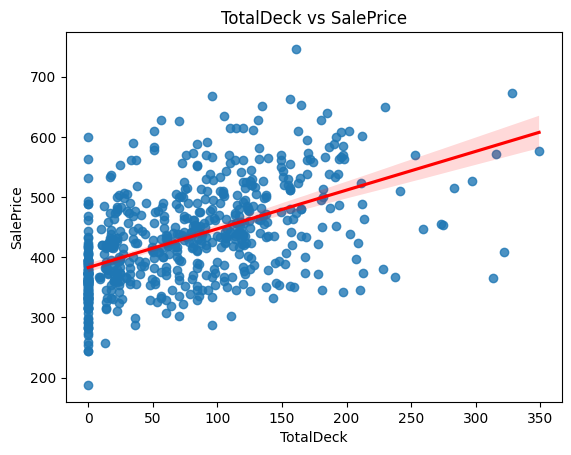

0.5210000399714614


In [9]:
# WoodDeckSF & OpenPorchSF
df_train['TotalDeck'] = (0.5 * df_train['WoodDeckSF']) + 0.5 * (df_train['OpenPorchSF'])

# Visualize the relationship between TotalSF and SalePrice
sns.regplot(data = df_train, x='TotalDeck', y='SalePrice', line_kws={'color': 'r'})
plt.title("TotalDeck vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['TotalDeck']['SalePrice'])

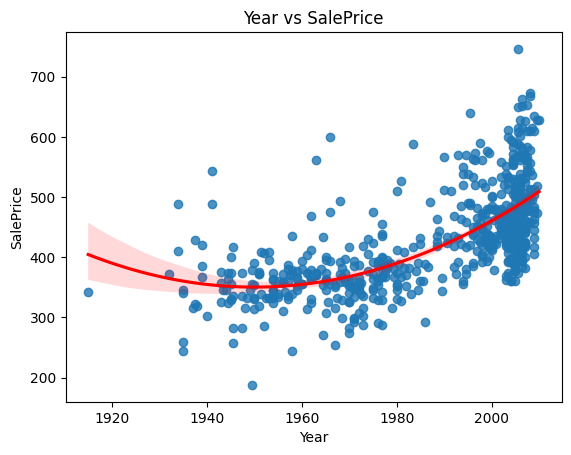

0.6464318354556671


In [10]:
# YearBuilt & YearRemodAdd
df_train['Year'] = (df_train['YearBuilt'] + df_train['YearRemodAdd']) / 2
sns.regplot(data = df_train, x='Year', y='SalePrice', line_kws={'color': 'r'}, order = 2)
plt.title("Year vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['Year']['SalePrice'])

## Feature Engineer (Discrete Variables)

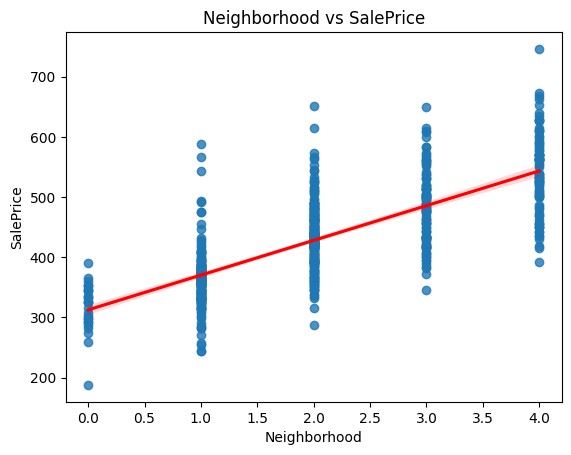

0.7560409127834147


In [11]:
# Neighborhood
df_train['Neighborhood'] = df_train['Neighborhood'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})

sns.regplot(data = df_train, x = 'Neighborhood', y = 'SalePrice', line_kws={'color':'r'})
plt.title("Neighborhood vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['Neighborhood']['SalePrice'])

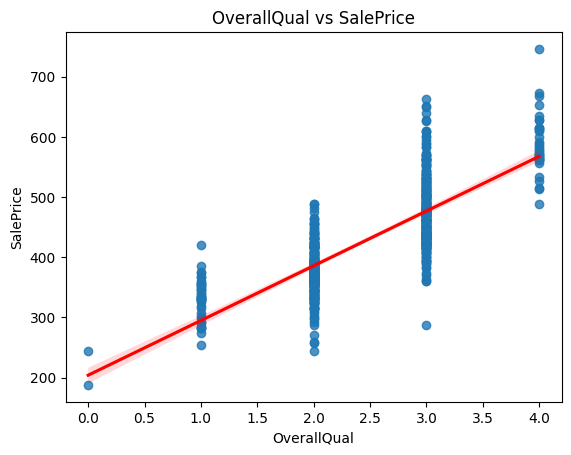

0.7872828491992839


In [12]:
# OverallQual
df_train['OverallQual'] = df_train['OverallQual'].map({1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:3, 9:4, 10:4})

sns.regplot(data = df_train, x = 'OverallQual', y = 'SalePrice', line_kws={'color':'r'})
plt.title("OverallQual vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['OverallQual']['SalePrice'])

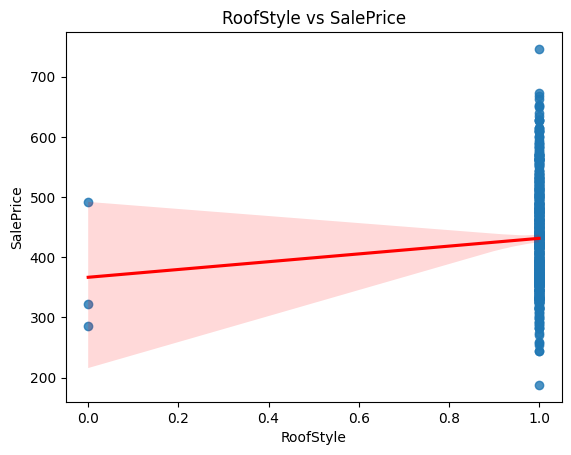

0.05363568236465019


In [13]:
# RoofStyle
df_train['RoofStyle'] = df_train['RoofStyle'].map({0:0, 2:0, 4:0, 5:0, 3:1, 1:1})

sns.regplot(x='RoofStyle', y='SalePrice', data=df_train, line_kws={'color':'r'})
plt.title("RoofStyle vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['RoofStyle']['SalePrice'])

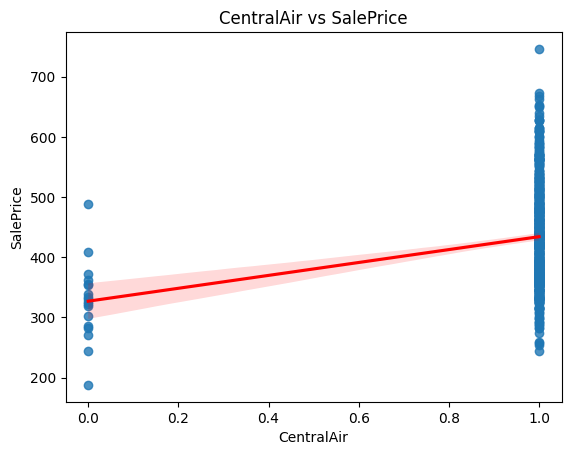

0.2150046037421167


In [14]:
# CentralAir
sns.regplot(x='CentralAir', y='SalePrice', data=df_train, line_kws={'color':'r'})
plt.title("CentralAir vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['CentralAir']['SalePrice'])

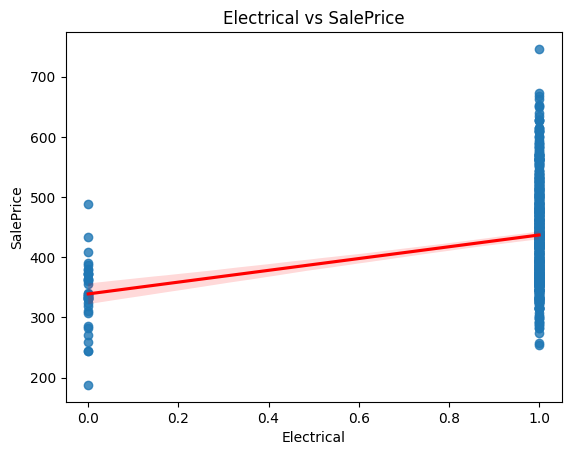

0.2807556619176068


In [15]:
# Electrical
df_train['Electrical'] = df_train['Electrical'].map({0:0, 1:0, 2:0, 3:0, 4:1, 5:0})

sns.regplot(x='Electrical', y='SalePrice', data=df_train, line_kws={'color':'r'})
plt.title("Electrical vs SalePrice")
plt.show()

print(df_train.corr(numeric_only=True)['Electrical']['SalePrice'])

## Feature note

Continuous variable: 
- LotFrontage (C w/ LotArea):
    - Corr w/ target = 0.351799
    - Corr w/ others = LotArea (0.426095), TotalSF (0.462352), GarageArea (0.344997), TotalBsmtSF (0.392075), 1stFlrSF(0.457181), BsmtFinSF1 (0.233633)
- LotArea (C w/LotFrontage):
    - Corr w/ target = 0.263843
    - Corr w/ others = LotFrontage (0.426095)
- YearBuilt (C w/ YearRemodAdd):
    - Corr w/ target = 0.522897
    - Corr w/ others = TotalBsmtSF (0.391452), GarageArea (0.478954), TotalSF (0.335488)
- YearRemodAdd (C w/ YearBuilt):
    - Corr w/ target = 0.507101
    - Corr w/ others = GarageYrBlt (0.642277)
- MasVnrArea (N):
    - Corr w/ target = 0.477493
    - Corr w/ others = GrLivArea (0.390857), TotalSF (0.443391) 
- BsmtFinSF1 (N): 
    - Corr w/ target = 0.386420
    - Corr w/ others = TotalBsmtSF (0.522396), 1stFlrSF (0.445863), TotalSF (0.411084)
- BsmtFinSF2 (N):
    - Corr w/ target = -0.011378
    - Corr w/ others = NA
- BsmtUnfSF (N): 
    - Corr w/ target = 0.214479
    - Corr w/ others = NA
- TotalBsmtSF (N): 
    - Corr w/ target = 0.613581
    - Corr w/ others = LotFrontage (0.392075), OverallQual (0.537808), 1stFlrSF (0.819530), GarageArea (0.486665)
- 1stFlrSF (N): 
    - Corr w/ target = 0.605852
    - Corr w/ others = LotFrontage (0.457181), OverallQual (0.476224), TotalBsmtSF (0.819530), GrLivArea (0.566024), GarageArea (0.489782), TotalSF (0.797678)
- 2ndFlrSF (N):
    - Corr w/ target = 0.319334
    - Corr w/ others = GrLivArea (0.687501)
- LowQualFinSF (N): 
    - Corr w/ target = -0.025606
    - Corr w/ others = NA
- GrLivArea (N):
    - Corr w/ target = 0.708624
    - Corr w/ others = All
- BsmtFullBath (N):
    - Corr w/ target = 0.227122
    - Corr w/ others = NA
- BsmtHalfBath (N):
    - Corr w/ target = -0.016844
    - Corr w/ others = NA
- FullBath (N):
    - Corr w/ target = 0.560664
    - Corr w/ others = TotalSF (0.574403), TotRmsAbvGrd (0.554784)
- HalfBath (N):
    - Corr w/ target = 0.284108
    - Corr w/ others = NA
- BedroomAbvGr (N): 
    - Corr w/ target = 0.168213
    - Corr w/ others = NA
- KitchenAbvGr (N): 
    - Corr w/ target = -0.135907
    - Corr w/ others = NA
- TotRmsAbvGrd (Y):
    - Corr w/ target = 0.533723
    - Corr w/ others = TotalSF (0.678802)
- Fireplaces (Y):
    - Corr w/ target = 0.466929
    - Corr w/ others = TotalSF (0.475416)
- GarageYrBlt (N):
    - Corr w/ target = 0.486362
    - Corr w/ others = GarageArea (0.564567)
- GarageCars (N):
    - Corr w/ target = 0.640409
    - Corr w/ others = All
- GarageArea (N):
    - Corr w/ target = 0.623431
    - Corr w/ others = All
- WoodDeckSF (C w/ OpenPorchSF):
    - Corr w/ target = 0.324413
    - Corr w/ others = TotalSF (0.281459) 
- OpenPorchSF (C w/ WoodDeckSF):
    - Corr w/ target = 0.315856
    - Corr w/ others = TotalSF (0.342402)
- EnclosedPorch (N):
    - Corr w/ target = -0.128578
    - Corr w/ others = NA
- 3SsnPorch (N):
    - Corr w/ target = 0.044584
    - Corr w/ others = NA
- ScreenPorch (N):
    - Corr w/ target = 0.111447
    - Corr w/ others = NA
- PoolArea (N):
    - Corr w/ target = 0.092404
    - Corr w/ others = NA
- MiscVal (N):
    - Corr w/ target = -0.021190
    - Corr w/ others = NA
- MoSold (N):
    - Corr w/ target = 0.046432
    - Corr w/ others = NA
- YrSold (N):
    - Corr w/ target = -0.028923
    - Corr w/ others =  NA
- TotalSF (N): 
    - Corr w/ target = 0.778959
    - Corr w/ others = All



Discrete Variable:
- MSSubClass (N): 
    - Corr w/ target = -0.084284
    - Corr w/ others = NA
- MSZoning (N): 
    - Corr w/ target = -0.166872
    - Corr w/ others = NA
- Street (Y/D): 
    - Corr w/ target = 0.041036
    - Corr w/ others = NA
- Alley (N): 
    - Corr w/ target = 0.139868
    - Corr w/ others = NA
- LotShape (N):
    - Corr w/ target = -0.255580
    - Corr w/ others = NA
- LandContour (N):
    - Corr w/ target = 0.015453
    - Corr w/ others = NA
- Utilities (N):
    - Corr w/ target = -0.014314
    - Corr w/ others = NA
- LotConfig (N):
    - Corr w/ target = -0.067396
    - Corr w/ others = NA
- LandSlope (N):
    - Corr w/ target = 0.051152
    - Corr w/ others = NA
- Neighborhood (Y): df_train['Neighborhood'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})
    - Corr w/ target = 0.210851
    - Corr w/ others = NA
- Condition1 (N):
    - Corr w/ target = 0.091155
    - Corr w/ others = NA
- Condition2 (N):
    - Corr w/ target = 0.007513
    - Corr w/ others = NA
- BldgType (N):
    - Corr w/ target = -0.085591
    - Corr w/ others = NA
- HouseStyle (N):
    - Corr w/ target = 0.180163
    - Corr w/ others = NA
- OverallQual (Y): df_train['OverallQual'].map({1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:3, 9:4, 10:4})
    - Corr w/ target = 0.790982
    - Corr w/ others = MasVnrArea (0.411876), YearBuilt (0.572323), YearRemodAdd (0.550684), BsmtFinSF1 (0.239666), TotalBsmtSF (0.537808), 1stFlrSF (0.476224), GrLivArea (0.593007), TotalSF (0.664830)
- OverallCond (N): 
    - Corr w/ target = -0.077856
    - Corr w/ others = NA
- RoofStyle (Y/D): df_train['RoofStyle'].map({0:0, 2:0, 4:0, 5:0, 3:1, 1:1})
    - Corr w/ target = 0.222405
    - Corr w/ others = NA
- RoofMatl (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- Exterior1st (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- Exterior2nd (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- MasVnrType (N):
    - Corr w/ target = 
    - Corr w/ others = NA
- ExterQual (Maybe, C w/ OverallQual):
- ExterCond (N):
- Foundation (N):
- BsmtQual (Maybe, C w/ OverallQual): df_train['BsmtQual'].map({1:0, 4:0, 3:1, 2:1, 0:2})
- BsmtCond (N): 
- BsmtExposure (N):
- BsmtFinType1 (N):
- BsmtFinType2 (N):
- Heating (N):
- HeatingQC (N): 
- CentralAir (Y/D):
- Electrical (Y/D): df_train['Electrical'].map({0:0, 1:0, 2:0, 3:0, 4:1, 5:0}), 0.241896
- KitchenQual (Maybe, C w/ OverallQual): df_train['KitchenQual'].map({1:0, 3:0, 2:1, 0:1}), 0.571018
- Functional (N):
- FireplaceQu (N):
- GarageType (N):
- GarageFinish (Y): 0.549247, df_train['GarageFinish'].map({3:0, 2:1, 1:2, 0:3})
- GarageQual (N):
- GarageCond (N):
- PavedDrive (Y/D): df_train['PavedDrive'].map({0:0, 1:0, 2:1}), 0.528002
- PoolQC (N):
- Fence (N):
- MiscFeature (N):
- SaleType (N):
- SaleCondition (N): 


## Feature Selection

In [16]:
from sklearn.impute import SimpleImputer
df_train = df_train[['TotalSF', 'TotalDeck', 'Year', 'Neighborhood', 'OverallQual',
                     'SalePrice', 'Electrical', 'CentralAir', 'RoofStyle']]

continuous_v = ['TotalSF', 'TotalDeck', 'Year', 'SalePrice']
discrete_v = ['Neighborhood', 'OverallQual',
                    'Electrical', 'CentralAir','RoofStyle']
df_train['Intercept'] = 1

imputer = SimpleImputer(strategy='mean').set_output(transform='pandas')
df_train = imputer.fit_transform(df_train.drop('SalePrice', axis=1)).join(df_train['SalePrice'])

## Test data features

In [17]:
df_test['TotalSF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF'] + df_test['GarageArea']
df_test['TotalDeck'] = (0.5 * df_test['WoodDeckSF']) + 0.5 * (df_test['OpenPorchSF'])
df_test['Year'] = (df_test['YearBuilt'] + df_test['YearRemodAdd']) / 2
df_test['Intercept'] = 1
df_test = df_test[['TotalSF', 'TotalDeck', 'Year', 'Neighborhood', 'OverallQual',
                     'Electrical', 'CentralAir', 'RoofStyle']]

In [18]:
# Neighborhood 
df_test['Neighborhood']= label_encoders['Neighborhood'].transform(df_test['Neighborhood'])
df_test['Neighborhood'] = df_test['Neighborhood'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})

In [19]:
# Electrical 
df_test['Electrical']= label_encoders['Electrical'].transform(df_test['Electrical'])
df_test['Electrical'] = df_test['Electrical'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})

In [20]:
# CentralAir 
df_test['CentralAir']= label_encoders['CentralAir'].transform(df_test['CentralAir'])
df_test['CentralAir'] = df_test['CentralAir'].map({10:0, 9:0, 17:0, 2:0, 17:1, 7:1, 3:1, 19:1, 1:1, 18:1, 12:1, 13:1,
11:2, 20:2, 8:2, 14:2, 0:2, 5:2, 4:2, 6:3, 24:3, 21:3, 23:3, 22:4, 15:4, 16:4})

In [21]:
# Retrieve the fitted LabelEncoder for 'RoofStyle'
roofstyle_encoder = label_encoders.get('RoofStyle')

if roofstyle_encoder:
    # Extract mapping from categories to encoded values
    roofstyle_mapping = dict(zip(roofstyle_encoder.classes_, roofstyle_encoder.transform(roofstyle_encoder.classes_)))

    # Print the mapping
    print("Label Encoding Mapping for 'RoofStyle':")
    for category, encoded_value in roofstyle_mapping.items():
        print(f"'{category}' -> {encoded_value}")
else:
    print("Error: 'RoofStyle' encoder not found in label_encoders dictionary.")

# RoofStyle
df_test['RoofStyle'] = df_test['RoofStyle'].map({'Flat':0, 'Gable':1,'Gambrel':2, 'Hip':3, 'Mansard':4, 'Shed':5})
df_test['RoofStyle'] = df_test['RoofStyle'].map({0:0, 2:0, 4:0, 5:0, 3:1, 1:1, 5:-1})


Label Encoding Mapping for 'RoofStyle':
'Flat' -> 0
'Gable' -> 1
'Gambrel' -> 2
'Hip' -> 3
'Mansard' -> 4


In [22]:
df_test['Intercept'] = 1
df_test = imputer.transform(df_test)

## Adding polynomial degrees

In [23]:
# Add polynomial degree and standardization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


poly = PolynomialFeatures(degree=2, include_bias=False).set_output(transform='pandas')
X_poly_train = poly.fit_transform(df_train[continuous_v].drop('SalePrice',axis=1))
X_poly_test = poly.transform(df_test[['TotalSF', 'TotalDeck', 'Year']])


stdsclr = StandardScaler().set_output(transform='pandas')
X_poly_train = stdsclr.fit_transform(X_poly_train).join(df_train[discrete_v])
X_poly_test = stdsclr.transform(X_poly_test).join(df_test[discrete_v])
df_train['SalePrice'] = stdsclr.fit_transform(df_train[['SalePrice']])


### Random Forest Regressor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold, cross_validate


y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_poly_train, y, test_size=0.2, random_state=33)

rf_model = RandomForestRegressor(n_estimators=100,
                                 max_depth=10,
                                 min_samples_split=5,
                                 max_features='sqrt',
                                 random_state=33)

kf = KFold(n_splits=5, shuffle=True, random_state=33)

scoring = {
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

cv_results = cross_validate(rf_model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Cross-Validation Results:")
print(f"Mean RMSE: {np.mean(cv_results['test_rmse']):.4f} ± {np.std(cv_results['test_rmse']):.4f}")
print(f"Mean R^2: {np.mean(cv_results['test_r2']):.4f} ± {np.std(cv_results['test_r2']):.4f}")


Cross-Validation Results:
Mean RMSE: 0.3649 ± 0.0464
Mean R^2: 0.8633 ± 0.0339


## fitting the test data

## XGBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_poly_train, y, train_size=0.25, random_state=33)


# XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'alpha': 1.5,
    'lambda': 0.5,
    'eta': 0.2,
    'max_depth': 100
}

# Store RMSE and R^2 for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation on training set
kf = KFold(n_splits=5, shuffle=True, random_state=33)

for train_idx, test_idx in kf.split(X_train):
    # Split the data using train_idx and test_idx
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    # Create DMatrix for train and test
    dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dtest = xgb.DMatrix(X_test_fold, label=y_test_fold)
    
    # Train the model
    xgb_model = xgb.train(params, dtrain, num_boost_round=100)
    
    # Make predictions
    y_pred = xgb_model.predict(dtest)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
    r2 = r2_score(y_test_fold, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print cross-validation results
print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Mean R^2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Mean RMSE: 0.3977 ± 0.0858
Mean R^2: 0.8208 ± 0.0890


## fitting the test data

In [26]:
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_poly_test)
y_pred = stdsclr.inverse_transform(y_pred.reshape(-1, 1))
y_pred = np.square(y_pred).flatten()
y_pred = pd.DataFrame({
    'Id': Id,
    'SalePrice':y_pred
})
y_pred.to_csv('~/Desktop/Submission.csv', index=False)